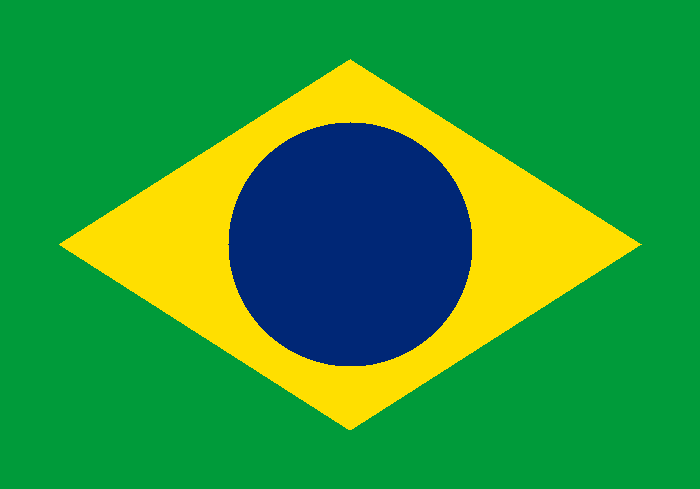

In [ ]:
def create_brazilian_flag(width):
    # Cores 
    GREEN = (0, 155, 58)
    YELLOW = (255, 223, 0)
    BLUE = (0, 39, 118)

    # Proporções da bandeira
    height = int((14 / 20) * width)    # Altura da bandeira
    unit = int (width / 20)            # Nossa unidade base de medida
    polygon_spacing = int (unit * 1.7) # Distanciamento da borda
    radius = int (unit * 3.5)          # Raio da nossa imagem
    center = (width//2, height//2)     # Definindo o centro da imagem

    # Definindo os pontos do nosso poligono (losango)
    # So precisamos definir um dos pontos, pois o outro é o proprio polygon_spacing
    top_x, top_y = center[0], polygon_spacing
    right_x, right_y = (width - polygon_spacing), center[1]
    bottom_x, bottom_y = center[0], (height - polygon_spacing)
    left_x, left_y = polygon_spacing, center[1]


    brazilian_flag = Image.new('RGB', (width, height), GREEN)
    
    # Interpolação de pontos
    # Calcula o ponto X para um determinado Y dentro da nossa reta P1 a P2
    def interpolate_x(y, start_point, final_point):
        if start_point[1] == final_point[1]:
            return start_point[0] #caso a reta seja horizontal (alinhada)
        
        # Para uma reta AB, dado um ponto y a equação calcula o x
        # x = Xa + (y - Ya) * (Xb - Xa) / (Yb - Ya)
        x = int (start_point[0] + (y - start_point[1]) * (final_point[0] - start_point[0]) / (final_point[1] - start_point[1]))
        return x

    for y in range(top_y, bottom_y):
        if y < center[1]: # Parte superior da bandeira
            x_min = interpolate_x(y, (top_x, top_y), (left_x, left_y))
            x_max = interpolate_x(y, (top_x, top_y), (right_x, right_y))
        else: # Parte inferior da bandeira
            x_min = interpolate_x(y, (left_x, left_y), (bottom_x, bottom_y))
            x_max = interpolate_x(y, (right_x, right_y), (bottom_x, bottom_y))
            
        # Para cada valor de (x, y) dentro do range, a gente vai pintar de amarelo    
        for x in range(x_min, x_max + 1):
            brazilian_flag.putpixel((x, y), YELLOW)

    # Aplicando a equação geral do circulo
    # x² + y² - 2ax - 2by + a² + b² - r² = 0
    for x in range(center[0]-radius, center[0]+radius):
        for y in range(center[1]-radius, center[1]+radius):
                if ((x-center[0])**2 + (y-center[1])**2) <= radius**2:
                    brazilian_flag.putpixel((x, y), BLUE)
    
    return brazilian_flag

create_brazilian_flag(700)
